In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import pickle

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load new data
new_df = pd.read_csv(r'E:\Internships\CSVs\7BLTE.csv')

In [4]:
# Extract cell for testing
X_test = new_df[[ 'PRBUsageUL', 'PRBUsageDL','meanThr_DL', 'meanThr_UL', 'maxThr_DL', 'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL']]

y_test =new_df['Unusual'] 

In [5]:
# Load trained model
with open('tree.pkl', 'rb') as f:
    tree = pickle.load(f)

In [6]:
# Make predictions on new data
predictions = tree.predict(X_test)
# Evaluate performance on new data
score = tree.score(X_test, y_test)
print('Test score:', score)

Test score: 0.864406779661017


In [7]:
#Confusion Matrix of Testing Class
print(confusion_matrix(y_test, predictions))

[[791  18]
 [134 178]]


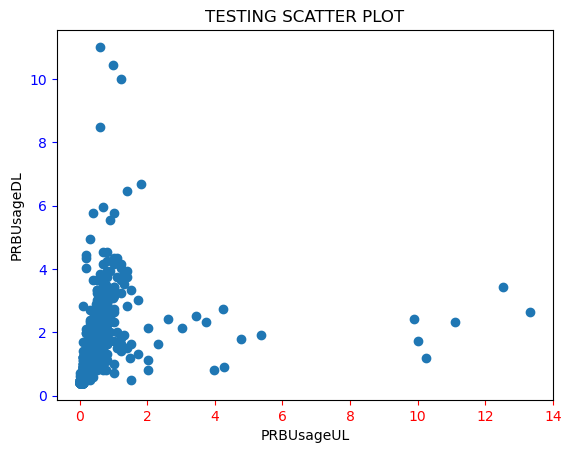

In [9]:
fig, ax = plt.subplots()
ax.scatter(X_test['PRBUsageUL'], X_test['PRBUsageDL'])
ax.set_xlabel('PRBUsageUL')
ax.set_ylabel('PRBUsageDL')
ax.tick_params(axis='x', colors='r')
ax.tick_params(axis='y', colors='b')
ax.set_title('TESTING SCATTER PLOT')
plt.show()

In [10]:
# CLASSIFICATION REPORT OF TESTING DATA
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       809
           1       0.91      0.57      0.70       312

    accuracy                           0.86      1121
   macro avg       0.88      0.77      0.81      1121
weighted avg       0.87      0.86      0.85      1121

